### Import libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load files

In [64]:
cn = pd.read_csv("files/channel.csv", header=None)
cn = cn.to_numpy().reshape(len(cn))
cn = np.pad(cn, (0, 1024-len(cn)), mode='constant', constant_values=0)

df1 = pd.read_csv("files/file1.csv", header=None)
df1 = df1.to_numpy()

In [69]:
df1.shape

(1003200, 1)

### Useful functions

In [65]:
def remove_cyclic_prefix(nparr):
    ofdm_sym = nparr.reshape(-1, 1056)
    ofdm_sym = ofdm_sym[:, 32:]
    return ofdm_sym

### Main code

In [66]:
x = np.arange(1024)

c:\Users\benso\Anaconda3\envs\part1a\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


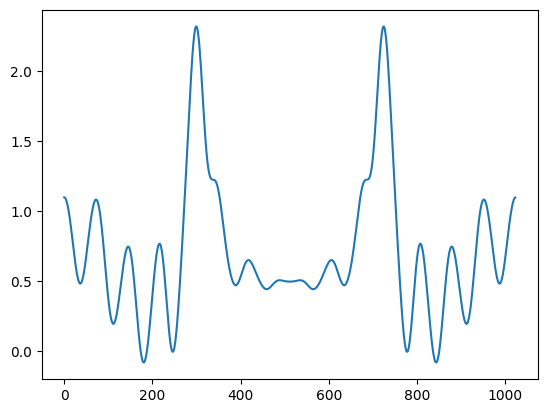

In [67]:
fft_channel = np.fft.fft(cn)
plt.plot(x, fft_channel)

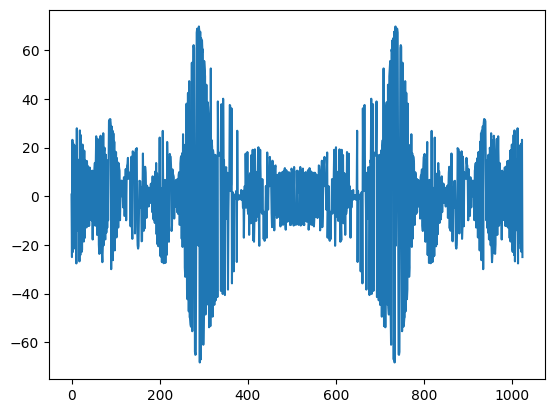

In [28]:
blocks = remove_cyclic_prefix(df1)
fft_blocks = np.fft.fft(blocks)
plt.plot(x, fft_blocks[0])

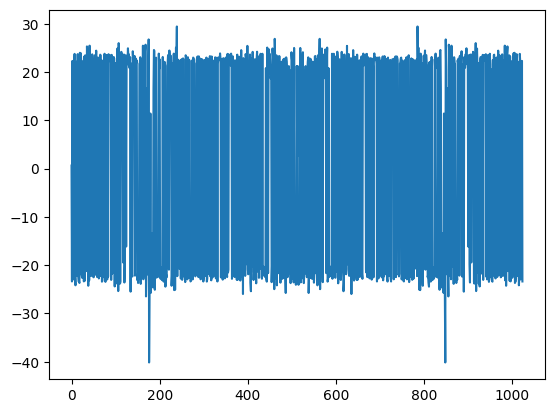

In [29]:
fft_signal = fft_blocks/fft_channel
plt.plot(x, fft_signal[0])

In [30]:
fft_signal[0]

array([  0.64395401 +0.j        , -23.37220042+23.51383688j,
        22.32089867-22.66471819j, ..., -22.74077391-22.91392517j,
        22.32089867+22.66471819j, -23.37220042-23.51383688j])

In [72]:
fft_info = fft_signal[:, 1:512]
fft_info.shape

(950, 511)

In [31]:
def min_distance_decoding(c):
    a, b = c.real, c.imag
    if a>=0:
        return "00" if b>=0 else "10"
    else:
        return "01" if b>=0 else "11"

In [73]:
decoded = np.vectorize(min_distance_decoding)(fft_info)

In [74]:
decoded_list = decoded.flatten()
decoded_str = "".join(decoded_list)

In [75]:
with open("Output.txt", "w") as text_file:
    text_file.write(decoded_str)

In [76]:
binary_string = decoded_str
binary_list = [int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8)]
print(binary_list)

[102, 105, 108, 101, 115, 47, 51, 56, 50, 57, 48, 49, 48, 50, 56, 55, 46, 116, 105, 102, 102, 0, 49, 50, 49, 50, 48, 54, 0, 73, 73, 42, 0, 50, 216, 1, 0, 127, 106, 111, 71, 112, 116, 73, 115, 119, 72, 114, 119, 66, 119, 123, 68, 125, 128, 74, 133, 136, 76, 137, 139, 75, 141, 143, 80, 150, 153, 87, 158, 161, 94, 163, 166, 98, 167, 169, 101, 171, 172, 107, 171, 173, 108, 170, 172, 108, 167, 169, 109, 160, 163, 107, 154, 156, 105, 149, 150, 109, 146, 145, 110, 148, 147, 116, 150, 148, 120, 153, 151, 125, 156, 154, 128, 156, 155, 129, 154, 154, 127, 151, 152, 122, 153, 155, 122, 155, 157, 122, 156, 157, 124, 154, 155, 123, 154, 153, 124, 155, 154, 126, 156, 155, 129, 159, 157, 133, 157, 154, 133, 152, 149, 129, 150, 147, 129, 151, 148, 130, 154, 152, 130, 159, 157, 131, 161, 160, 110, 129, 163, 163, 127, 163, 162, 127, 159, 158, 128, 152, 151, 121, 147, 146, 115, 145, 144, 114, 147, 145, 117, 151, 149, 121, 153, 152, 119, 155, 154, 121, 155, 153, 123, 152, 151, 123, 149, 148, 119, 147, 145

In [78]:
[chr(x) for x in binary_list]


['f',
 'i',
 'l',
 'e',
 's',
 '/',
 '3',
 '8',
 '2',
 '9',
 '0',
 '1',
 '0',
 '2',
 '8',
 '7',
 '.',
 't',
 'i',
 'f',
 'f',
 '\x00',
 '1',
 '2',
 '1',
 '2',
 '0',
 '6',
 '\x00',
 'I',
 'I',
 '*',
 '\x00',
 '2',
 'Ø',
 '\x01',
 '\x00',
 '\x7f',
 'j',
 'o',
 'G',
 'p',
 't',
 'I',
 's',
 'w',
 'H',
 'r',
 'w',
 'B',
 'w',
 '{',
 'D',
 '}',
 '\x80',
 'J',
 '\x85',
 '\x88',
 'L',
 '\x89',
 '\x8b',
 'K',
 '\x8d',
 '\x8f',
 'P',
 '\x96',
 '\x99',
 'W',
 '\x9e',
 '¡',
 '^',
 '£',
 '¦',
 'b',
 '§',
 '©',
 'e',
 '«',
 '¬',
 'k',
 '«',
 '\xad',
 'l',
 'ª',
 '¬',
 'l',
 '§',
 '©',
 'm',
 '\xa0',
 '£',
 'k',
 '\x9a',
 '\x9c',
 'i',
 '\x95',
 '\x96',
 'm',
 '\x92',
 '\x91',
 'n',
 '\x94',
 '\x93',
 't',
 '\x96',
 '\x94',
 'x',
 '\x99',
 '\x97',
 '}',
 '\x9c',
 '\x9a',
 '\x80',
 '\x9c',
 '\x9b',
 '\x81',
 '\x9a',
 '\x9a',
 '\x7f',
 '\x97',
 '\x98',
 'z',
 '\x99',
 '\x9b',
 'z',
 '\x9b',
 '\x9d',
 'z',
 '\x9c',
 '\x9d',
 '|',
 '\x9a',
 '\x9b',
 '{',
 '\x9a',
 '\x99',
 '|',
 '\x9b',
 '\x9a',
 '~',
 